# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data

In [3]:
path_2_root = '../'
path_2_data = path_2_root + 'data/csv/renewable_energy/'
filename = '20250607_global_renewable_energy.csv'
df = pd.read_csv(path_2_data + filename)
df.head(2)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,Japan,2023,Hydro,14777.088879,28986.542237,1.316801e+09,898948417,1.127765e+14,240448.871987,54523.655206,...,16.571965,98.748097,47.656214,192,1,4835,642781,2.376701,0,1
1,France,2023,Geothermal,72358.095267,18049.024093,7.751321e+09,350404495,6.229038e+11,616900.178739,64122.299217,...,21.841195,51.662293,34.857807,549,78,707,749892,73.655750,1,1


In [5]:
import pycountry

def get_country_alpha3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# First, create the Country Code column
df['Country Code'] = df['Country'].apply(get_country_alpha3)

# Then reorder columns if desired
cols = ['Country Code'] + [col for col in df.columns if col != 'Country Code']
df = df[cols]

df.head(2)

,Country Code,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,JPN,Japan,2023,Hydro,14777.088879,28986.542237,1.316801e+09,898948417,1.127765e+14,240448.871987,...,16.571965,98.748097,47.656214,192,1,4835,642781,2.376701,0,1
1,FRA,France,2023,Geothermal,72358.095267,18049.024093,7.751321e+09,350404495,6.229038e+11,616900.178739,...,21.841195,51.662293,34.857807,549,78,707,749892,73.655750,1,1


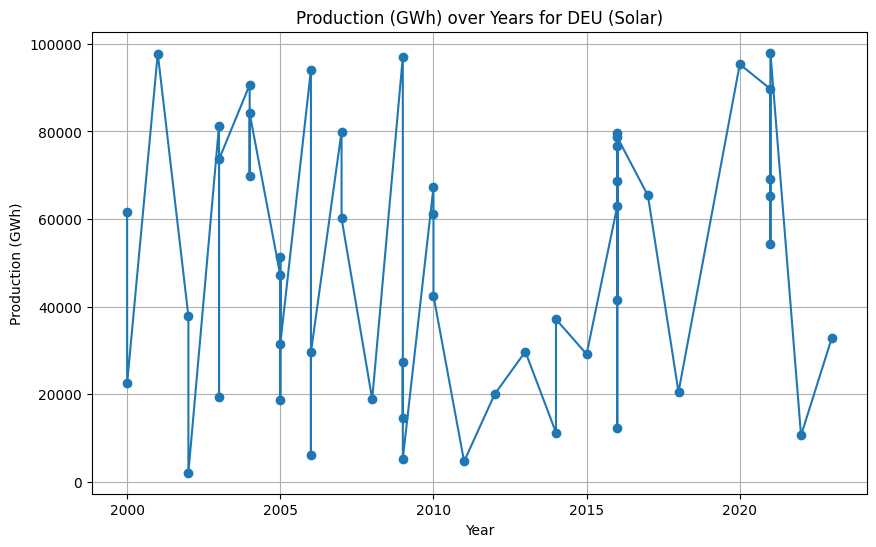

In [29]:
# function to plot desired data by using its column name (e.g. 'Production (GWh)') for a user-defined target country and energy type
def plot_column_country_energytype(country_df, country, column, energy_type):
  if column not in df.columns:
    print(f"Column '{column}' not found in dataframe.")
    return
  country_df = df[(df['Country Code'] == country) & (df['Energy Type'] == energy_type)]
  if country_df.empty:
    print(f"No data found for country '{country}' with energy type '{energy_type}'.")
    return
  plt.figure(figsize=(10, 6))
  plt.plot(country_df['Year'], country_df[column], marker='o')
  plt.title(f"{column} over Years for {country} ({energy_type})")
  plt.xlabel('Year')
  plt.ylabel(column)
  plt.grid(True)
  plt.show()

country_df = df
country = 'DEU'
column = 'Production (GWh)'
energy_type = 'Solar'
plot_column_country_energytype(country_df, country, column, energy_type)

In [28]:
df_filtered = df[(df["Country Code"] == "DEU") & (df["Energy Type"] == "Solar")]
df_filtered

,Country Code,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
50,DEU,Germany,2023,Solar,32778.941974,11813.393153,3.085533e+09,1229677731,1.042711e+14,144271.054679,...,93.871334,82.880729,45.680237,474,95,3847,938053,5.194177,0,0
129,DEU,Germany,2022,Solar,10610.229944,47356.362911,6.499525e+09,991787552,1.253232e+14,409401.312247,...,43.994046,66.941691,18.349991,40,84,2164,132738,36.153913,0,1
247,DEU,Germany,2021,Solar,97981.704683,19986.277112,3.841067e+09,354432313,3.914481e+13,798617.916350,...,51.183082,62.112760,37.867966,404,24,3416,778508,4.464437,0,1
266,DEU,Germany,2021,Solar,65345.330034,38754.121857,7.624951e+09,540310666,1.677175e+13,357149.984051,...,54.908559,3.222218,62.402010,78,25,9322,127239,85.747790,1,1
272,DEU,Germany,2021,Solar,54203.578976,7809.451108,6.858928e+07,1412465835,6.360275e+13,561410.078583,...,97.372446,77.988471,16.464783,34,13,4664,771457,43.691392,0,1
275,DEU,Germany,2021,Solar,69110.302732,1600.085286,8.550042e+09,500965028,5.338480e+13,512267.091454,...,97.484615,77.204171,27.137244,503,24,4533,158901,51.970904,1,0
305,DEU,Germany,2021,Solar,89707.405548,1398.386521,6.228337e+09,67559919,1.621969e+14,994011.388387,...,45.745267,3.862570,48.333939,872,19,845,237967,68.267053,0,0
385,DEU,Germany,2020,Solar,95356.947256,21505.703408,7.646277e+09,626847710,4.028332e+13,652473.781589,...,25.417269,46.234626,40.468318,246,12,8326,106867,69.646505,1,1
578,DEU,Germany,2018,Solar,20529.772513,23812.331934,9.848949e+08,954143200,1.771662e+14,195281.520697,...,47.566576,95.879010,78.056747,538,76,8557,993508,44.703298,1,0
637,DEU,Germany,2017,Solar,65392.569698,42808.625565,4.984377e+09,670785485,2.965390e+13,761012.268630,...,0.309657,21.916759,55.592079,686,9,4762,245529,94.539966,0,1


In [16]:
## calculate the sum over the world for desired column name
def sum_per_year(df, column):
    sum_per_year = (
        df.groupby("Year")[column].sum().reset_index().sort_values("Year")
)
    #sum_per_year = df.groupby(year)[column].sum()
    return sum_per_year


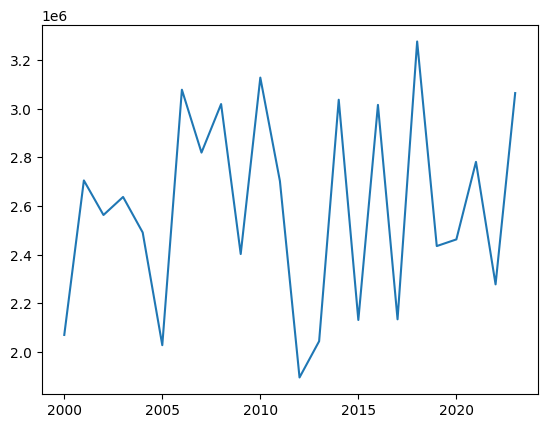

In [19]:
sum_inst_cap_per_year = sum_per_year(df, column ='Installed Capacity (MW)')
sum_inst_cap_per_year
plt.plot(sum_inst_cap_per_year['Year'],sum_inst_cap_per_year['Installed Capacity (MW)'] )


In [25]:
df['Energy Type'].unique()


array(['Hydro', 'Geothermal', 'Solar', 'Biomass', 'Wind'], dtype=object)